In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


In [ ]:
df = pd.read_excel('flightfare.xlsx')

In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
df.shape

(10683, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
duplicate = df[df.duplicated()]
len(duplicate)

220

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
duplicate = df[df.duplicated()]
len(duplicate)

0

In [ ]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
nan_rows = df[df.isnull().any(1)]
print (nan_rows)

        Airline Date_of_Journey Source Destination Route Dep_Time  \
9039  Air India       6/05/2019  Delhi      Cochin   NaN    09:45   

      Arrival_Time Duration Total_Stops Additional_Info  Price  
9039  09:25 07 May  23h 40m         NaN         No info   7480  


In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [ ]:
df['Additional_Info'].value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [ ]:
df.drop('Additional_Info',axis = 1, inplace = True)

In [ ]:
df.shape

(10462, 10)

In [ ]:
df.drop('Route',axis = 1, inplace = True)

In [ ]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Dep_Time',
       'Arrival_Time', 'Duration', 'Total_Stops', 'Price'],
      dtype='object')

In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302


In [ ]:
df.Airline.value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

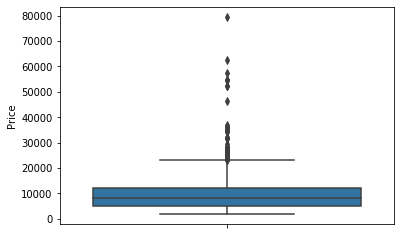

In [ ]:
sns.boxplot(y="Price", data =df)
plt.show()

In [ ]:
for i in range(0,100,10):
    var =df["Price"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is 1759
10 percentile value is 3943
20 percentile value is 4804
30 percentile value is 5963
40 percentile value is 7064
50 percentile value is 8266
60 percentile value is 10031
70 percentile value is 11134
80 percentile value is 13029
90 percentile value is 14714
100 percentile value is  79512


In [ ]:
for i in range(90,100):
    var =df["Price"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

90 percentile value is 14714
91 percentile value is 14781
92 percentile value is 14871
93 percentile value is 15129
94 percentile value is 15288
95 percentile value is 15764
96 percentile value is 16289
97 percentile value is 17057
98 percentile value is 18387
99 percentile value is 22270
100 percentile value is  79512


In [ ]:
for i in np.arange(0.0, 1.0, 0.1):
    var =df["Price"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 22270
99.1 percentile value is 23001
99.2 percentile value is 24318
99.3 percentile value is 25735
99.4 percentile value is 26890
99.5 percentile value is 26890
99.6 percentile value is 26890
99.7 percentile value is 27992
99.8 percentile value is 31825
99.9 percentile value is 36235
100 percentile value is  79512


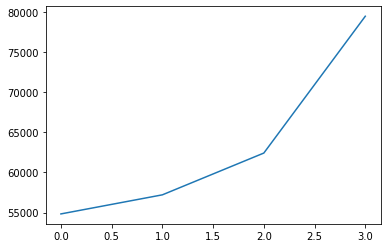

In [ ]:
plt.plot(var[-4:])
plt.show()

In [ ]:
df[df.Price > 40000]

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
657,Jet Airways Business,01/03/2019,Banglore,New Delhi,05:45,10:45,5h,1 stop,52229
1478,Jet Airways,18/03/2019,Banglore,New Delhi,18:40,00:45 16 Mar,6h 5m,1 stop,54826
2618,Jet Airways,18/03/2019,Banglore,New Delhi,22:50,05:05 16 Mar,6h 15m,1 stop,54826
2924,Jet Airways Business,01/03/2019,Banglore,New Delhi,05:45,11:25,5h 40m,1 stop,79512
5372,Jet Airways Business,01/03/2019,Banglore,New Delhi,05:45,12:25,6h 40m,1 stop,62427
5439,Jet Airways,01/03/2019,Banglore,New Delhi,16:55,23:00,6h 5m,1 stop,54826
7351,Jet Airways Business,3/03/2019,Delhi,Cochin,20:05,04:25 04 Mar,8h 20m,2 stops,46490
9715,Jet Airways Business,6/03/2019,Delhi,Cochin,20:05,04:25 07 Mar,8h 20m,2 stops,52285
10364,Jet Airways Business,01/03/2019,Banglore,New Delhi,09:45,14:25,4h 40m,1 stop,57209


In [ ]:
x = df.drop('Price',axis = 1)
y = df['Price']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state = 3)
#x_train, x_cv, y_train, y_cv = train_test_split(x_train, y_train, test_size=0.2)

In [ ]:

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7323, 8)
(7323,)
(3139, 8)
(3139,)


In [ ]:
x_train.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops
3310,Multiple carriers,9/03/2019,Delhi,Cochin,17:25,01:35 10 Mar,8h 10m,1 stop
4627,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,08:55,19:15,10h 20m,1 stop
2034,Jet Airways,27/06/2019,Delhi,Cochin,18:20,19:00 28 Jun,24h 40m,2 stops
8448,SpiceJet,6/06/2019,Kolkata,Banglore,22:20,00:40 07 Jun,2h 20m,non-stop
6046,IndiGo,12/04/2019,Kolkata,Banglore,21:25,00:05 13 Apr,2h 40m,non-stop


In [ ]:
Airline  = x_train['Airline']
Airline = pd.get_dummies(Airline,drop_first = True )
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy
3310,0,0,0,0,0,1,0,0,0,0
4627,0,0,0,0,0,0,1,0,0,0
2034,0,0,0,1,0,0,0,0,0,0
8448,0,0,0,0,0,0,0,1,0,0
6046,0,0,1,0,0,0,0,0,0,0


In [ ]:
Source  = x_train['Source']
Source = pd.get_dummies(Source,drop_first = True )
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
3310,0,1,0,0
4627,0,1,0,0
2034,0,1,0,0
8448,0,0,1,0
6046,0,0,1,0


In [ ]:
Destination   = x_train['Destination']
Destination  = pd.get_dummies(Destination ,drop_first = True )
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
3310,1,0,0,0,0
4627,1,0,0,0,0
2034,1,0,0,0,0
8448,0,0,0,0,0
6046,0,0,0,0,0


In [ ]:
x_train.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops
3310,Multiple carriers,9/03/2019,Delhi,Cochin,17:25,01:35 10 Mar,8h 10m,1 stop
4627,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,08:55,19:15,10h 20m,1 stop
2034,Jet Airways,27/06/2019,Delhi,Cochin,18:20,19:00 28 Jun,24h 40m,2 stops
8448,SpiceJet,6/06/2019,Kolkata,Banglore,22:20,00:40 07 Jun,2h 20m,non-stop
6046,IndiGo,12/04/2019,Kolkata,Banglore,21:25,00:05 13 Apr,2h 40m,non-stop


In [ ]:
x_train['Total_Stops'].value_counts()

1 stop      3916
non-stop    2435
2 stops      937
3 stops       35
Name: Total_Stops, dtype: int64

In [ ]:
x_train['Total_Stops'].replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3},inplace = True)

C:\Users\Chara\Anaconda3\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [ ]:
x_train.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops
3310,Multiple carriers,9/03/2019,Delhi,Cochin,17:25,01:35 10 Mar,8h 10m,1
4627,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,08:55,19:15,10h 20m,1
2034,Jet Airways,27/06/2019,Delhi,Cochin,18:20,19:00 28 Jun,24h 40m,2
8448,SpiceJet,6/06/2019,Kolkata,Banglore,22:20,00:40 07 Jun,2h 20m,0
6046,IndiGo,12/04/2019,Kolkata,Banglore,21:25,00:05 13 Apr,2h 40m,0


In [ ]:
x_train.drop(['Airline','Source','Destination'],axis = 1,inplace = True)

C:\Users\Chara\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
x_train.shape

(7323, 5)

In [ ]:
x_train.head()

,Date_of_Journey,Dep_Time,Arrival_Time,Duration,Total_Stops
3310,9/03/2019,17:25,01:35 10 Mar,8h 10m,1
4627,21/03/2019,08:55,19:15,10h 20m,1
2034,27/06/2019,18:20,19:00 28 Jun,24h 40m,2
8448,6/06/2019,22:20,00:40 07 Jun,2h 20m,0
6046,12/04/2019,21:25,00:05 13 Apr,2h 40m,0


In [ ]:
x_train = pd.concat([x_train,Airline,Source,Destination],axis =1)

In [ ]:
x_train.head()

,Date_of_Journey,Dep_Time,Arrival_Time,Duration,Total_Stops,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
3310,9/03/2019,17:25,01:35 10 Mar,8h 10m,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4627,21/03/2019,08:55,19:15,10h 20m,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
2034,27/06/2019,18:20,19:00 28 Jun,24h 40m,2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
8448,6/06/2019,22:20,00:40 07 Jun,2h 20m,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
6046,12/04/2019,21:25,00:05 13 Apr,2h 40m,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
x_train.shape

(7323, 24)

In [ ]:
x_train['Day_of_Journey'] = pd.to_datetime(x_train['Date_of_Journey']).dt.day

In [ ]:
x_train['month_of_Journey'] = pd.to_datetime(x_train['Date_of_Journey']).dt.month

In [ ]:
x_train['year_of_Journey'] = pd.to_datetime(x_train['Date_of_Journey']).dt.year

In [ ]:
x_train.head()

,Date_of_Journey,Dep_Time,Arrival_Time,Duration,Total_Stops,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Day_of_Journey,month_of_Journey,year_of_Journey
3310,9/03/2019,17:25,01:35 10 Mar,8h 10m,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,3,9,2019
4627,21/03/2019,08:55,19:15,10h 20m,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,21,3,2019
2034,27/06/2019,18:20,19:00 28 Jun,24h 40m,2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,27,6,2019
8448,6/06/2019,22:20,00:40 07 Jun,2h 20m,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,6,6,2019
6046,12/04/2019,21:25,00:05 13 Apr,2h 40m,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4,12,2019


In [ ]:
x_train.drop(['Date_of_Journey'],axis = 1,inplace = True)

In [ ]:
x_train.head()

,Dep_Time,Arrival_Time,Duration,Total_Stops,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Day_of_Journey,month_of_Journey,year_of_Journey
3310,17:25,01:35 10 Mar,8h 10m,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,3,9,2019
4627,08:55,19:15,10h 20m,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,21,3,2019
2034,18:20,19:00 28 Jun,24h 40m,2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,27,6,2019
8448,22:20,00:40 07 Jun,2h 20m,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,6,6,2019
6046,21:25,00:05 13 Apr,2h 40m,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4,12,2019


In [ ]:
x_train.year_of_Journey.value_counts()

2019    7323
Name: year_of_Journey, dtype: int64

In [ ]:
x_train.drop(['year_of_Journey'],axis = 1,inplace = True)

In [ ]:
x_train.head()

,Dep_Time,Arrival_Time,Duration,Total_Stops,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Day_of_Journey,month_of_Journey
3310,17:25,01:35 10 Mar,8h 10m,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,3,9
4627,08:55,19:15,10h 20m,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,21,3
2034,18:20,19:00 28 Jun,24h 40m,2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,27,6
8448,22:20,00:40 07 Jun,2h 20m,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,6,6
6046,21:25,00:05 13 Apr,2h 40m,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4,12


In [ ]:
x_train['Duration']= pd.to_timedelta(x_train['Duration']).dt.seconds

In [ ]:
x_train['Duration'] = x_train['Duration']/60

In [ ]:
x_train.head()

,Dep_Time,Arrival_Time,Duration,Total_Stops,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Day_of_Journey,month_of_Journey
3310,17:25,01:35 10 Mar,490.0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,3,9
4627,08:55,19:15,620.0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,21,3
2034,18:20,19:00 28 Jun,40.0,2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,27,6
8448,22:20,00:40 07 Jun,140.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,6,6
6046,21:25,00:05 13 Apr,160.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4,12


In [ ]:
x_train['arrival_hour'] = pd.to_datetime(x_train['Arrival_Time']).dt.hour

In [ ]:
x_train['arrival_minutes'] = pd.to_datetime(x_train['Arrival_Time']).dt.minute

In [ ]:
x_train['dep_hour'] = pd.to_datetime(x_train['Dep_Time']).dt.hour

In [ ]:
x_train['dep_minutes'] = pd.to_datetime(x_train['Dep_Time']).dt.minute

In [ ]:
x_train.drop(['Arrival_Time','Dep_Time'],axis = 1,inplace = True)

In [ ]:
x_train.head()

,Duration,Total_Stops,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Day_of_Journey,month_of_Journey,arrival_hour,arrival_minutes,dep_hour,dep_minutes
3310,490.0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,3,9,1,35,17,25
4627,620.0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,21,3,19,15,8,55
2034,40.0,2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,27,6,19,0,18,20
8448,140.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,6,6,0,40,22,20
6046,160.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4,12,0,5,21,25


In [ ]:
y_train.shape

(7323,)

In [ ]:
# perform everything on test data now

In [ ]:
x_test.shape

(3139, 27)

In [ ]:
x_test.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops
3017,SpiceJet,27/03/2019,Kolkata,Banglore,06:55,09:35,2h 40m,non-stop
9830,IndiGo,15/04/2019,Delhi,Cochin,07:35,16:10,8h 35m,1 stop
1506,SpiceJet,1/04/2019,Kolkata,Banglore,22:20,00:40 02 Apr,2h 20m,non-stop
4587,IndiGo,3/03/2019,Delhi,Cochin,14:30,17:35,3h 5m,non-stop
8189,Jet Airways,12/03/2019,Banglore,New Delhi,07:00,23:00,16h,1 stop


In [ ]:
x_test['Total_Stops'].value_counts()

1    1709
0    1040
2     381
3       8
4       1
Name: Total_Stops, dtype: int64

In [ ]:
# Airline
Airline  = x_test['Airline']
Airline = pd.get_dummies(Airline,drop_first = True )

# Source
Source  = x_test['Source']
Source = pd.get_dummies(Source,drop_first = True )

#Destination
Destination   = x_test['Destination']
Destination  = pd.get_dummies(Destination ,drop_first = True )

#Total_stops
x_test['Total_Stops'].replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace = True)

x_test = pd.concat([x_test,Airline,Source,Destination],axis =1)

# Time features
x_test['Day_of_Journey'] = pd.to_datetime(x_test['Date_of_Journey']).dt.day
x_test['month_of_Journey'] = pd.to_datetime(x_test['Date_of_Journey']).dt.month
x_test['Duration']= pd.to_timedelta(x_test['Duration']).dt.seconds
x_test['Duration'] = x_test['Duration']/60
x_test['arrival_hour'] = pd.to_datetime(x_test['Arrival_Time']).dt.hour
x_test['arrival_minutes'] = pd.to_datetime(x_test['Arrival_Time']).dt.minute
x_test['dep_hour'] = pd.to_datetime(x_test['Dep_Time']).dt.hour
x_test['dep_minutes'] = pd.to_datetime(x_test['Dep_Time']).dt.minute


x_test.drop(['Airline','Source','Destination','Date_of_Journey','Arrival_Time','Dep_Time'],axis = 1,inplace = True)
x_test.head()

,Duration,Total_Stops,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Day_of_Journey,month_of_Journey,arrival_hour,arrival_minutes,dep_hour,dep_minutes
3017,160.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,27,3,9,35,6,55
9830,515.0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,15,4,16,10,7,35
1506,140.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,4,1,0,40,22,20
4587,185.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,3,3,17,35,14,30
8189,960.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,12,23,0,7,0


In [ ]:

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x_train, y_train)

C:\Users\Chara\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [ ]:

print(selection.feature_importances_)

[3.32166202e-02 2.95979101e-01 8.15765963e-03 1.73875827e-03
 1.55632879e-02 1.45730282e-01 8.47085106e-02 2.19937964e-02
 8.19537049e-04 3.76916734e-03 6.21017496e-03 1.77915695e-04
 5.04108569e-04 2.72441774e-03 3.96379104e-03 6.33724560e-03
 2.09107972e-03 2.39998524e-02 1.31569286e-02 8.55115775e-04
 2.33219585e-02 1.01438238e-01 8.27819577e-02 3.21804498e-02
 2.88764639e-02 3.22607600e-02 2.74428217e-02]


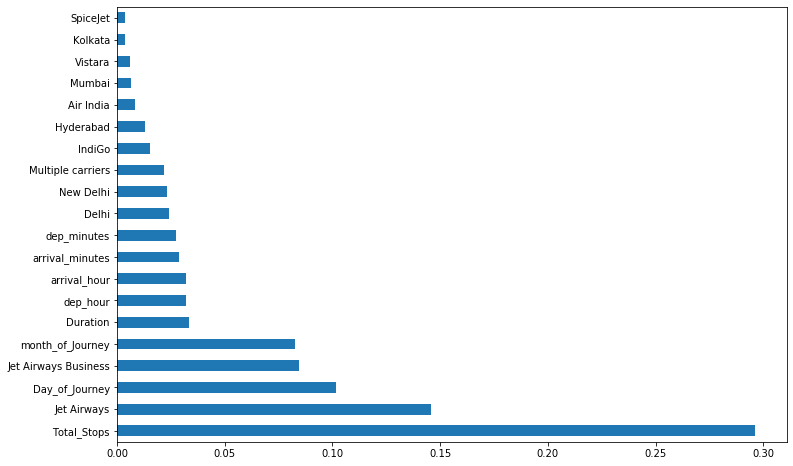

In [ ]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [ ]:

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

clf = RandomForestRegressor()
clf.fit(x_train, y_train)
pred = clf.predict(x_test)

# print regression metrics

print('R-Square:', metrics.r2_score(y_test, pred))
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))


C:\Users\Chara\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


R-Square: 0.7783812395001514
MAE: 1312.0121869769464
MSE: 4496304.685474597
RMSE: 2120.4491706887475


In [ ]:
clf.score(x_train,y_train)

0.9507265621007193

In [ ]:
clf.score(x_test,y_test)

0.7783812395001514

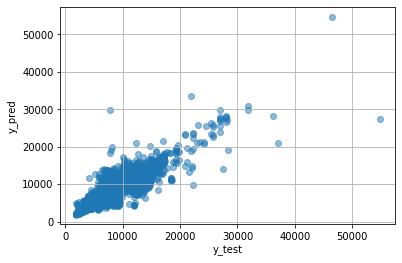

In [ ]:
plt.scatter(y_test, pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.grid()
plt.show()

In [ ]:
#--------------- RandomForest Regressor with Randomsearch CV----------------

from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

model = RandomForestRegressor()

clf = RandomizedSearchCV(model,random_grid,scoring='neg_mean_squared_error', \
                        n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs =-1)
clf.fit(x_train,y_train)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.0min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [ ]:
clf.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [ ]:
clf.best_score_

-3751958.9168151086

In [ ]:
pred = clf.predict(x_test)

R-Square: 0.8104045218763446
MAE: 1259.1685441131076
MSE: 3846601.410049717
RMSE: 1961.2754549144076
Train score: -2132020.6231031534
Test score: -3846601.410049717


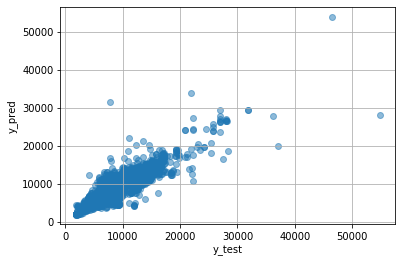

In [ ]:
# print regression metrics

print('R-Square:', metrics.r2_score(y_test, pred))
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('Train score:',clf.score(x_train,y_train))
print('Test score:',clf.score(x_test,y_test))

plt.scatter(y_test, pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.grid()
plt.show()

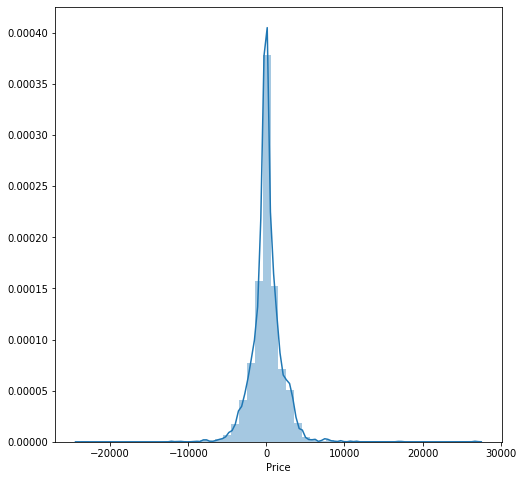

In [ ]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-pred)
plt.show()

In [ ]:
# pickle file

import joblib
from joblib import dump, load
joblib.dump(clf, 'flight_fare.pkl') 

loaded_model = joblib.load('flight_fare.pkl')
result = loaded_model.score(x_test, y_test)
print(result)

-3846601.410049717
